1 - Enunciado
Crie a árvore genealógica representada pela figura abaixo, utilizando a estrutura de dados Árvore. Em seguida, crie um método que recebe o nome de uma pessoa e informa se existe um integrante da família com esse nome (True) ou não (False).

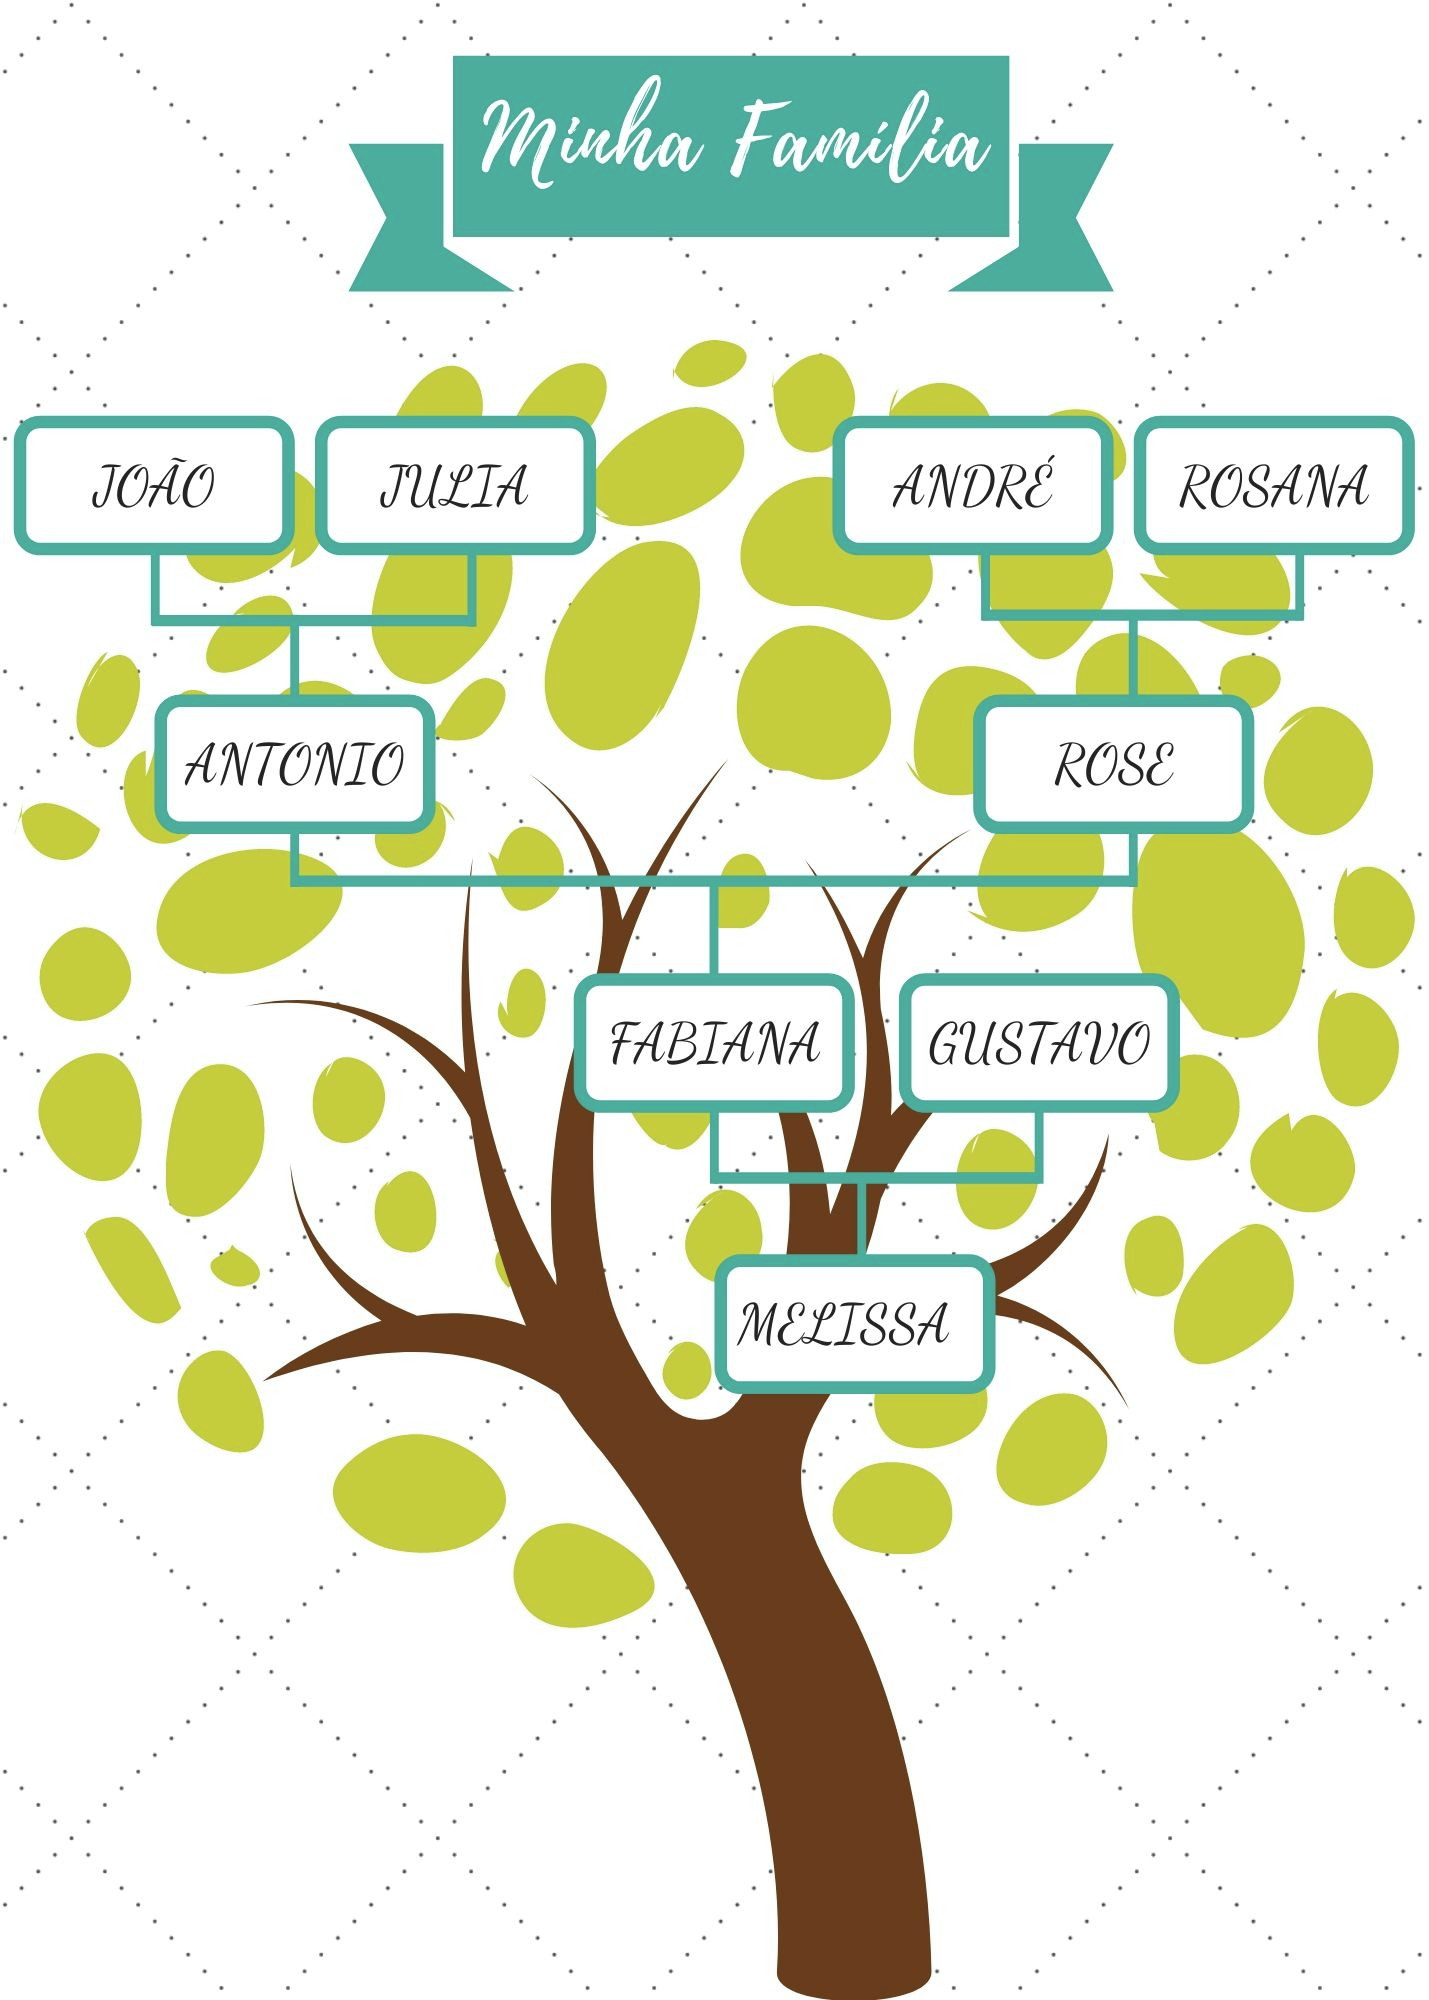

In [ ]:
class No: 
    def __init__(self, nome):
        self.nome = nome
        self.filhos = []

    def add_filho(self, no):
        self.filhos.append(no)
    
    def retorna_filho(self, nome):
        for filho in self.filhos:
            if filho.nome == nome:
                return filho
        
        return None 
    
    def pesquisar_pessoa(self, nome):
        if len(self.filhos) == 0:
            return None

        for filho in self.filhos:
            if filho.nome == nome:
                return filho

            netos = filho.pesquisar_pessoa(nome) 

            if netos is not None and netos.nome == nome:
                return netos
        
        return None
    
    def mostrar(self, peso=1):
        no = self.nome

        for filho in self.filhos:
            guias = "\t" * peso

            no += f'\n{guias}{filho.mostrar(peso + 1)}'
        
        return no

class Arvore():
    def __init__(self):
        self.rota = None

    def add_pessoa(self, nome, parente = None):
        if self.rota is None:
            self.rota = No (nome)
        else:
            if parente is None:
                return False
            
            if self.rota.nome == parente:
                self.rota.add_filho(No(nome))
            else:
                parente_no = self.rota.pesquisar_pessoa(parente)

                if parente_no is None:
                    return False
                
                parente_no.add_filho(No(nome))
        
        return True

    def em_familia(self, nome):
        if self.rota is None:
            return False
        
        if self.rota.nome == nome:
            return True
        
        pessoa = self.rota.pesquisar_pessoa(nome)

        if pessoa is None:
            return False
        
        return True

    def __repr__(self):
        return str(self.rota.mostrar())

familia = Arvore()

print(familia.add_pessoa('Melissa'))
print(familia.add_pessoa('Fabiana', 'Melissa'))
print(familia.add_pessoa('Gustavo', 'Melissa'))
print(familia.add_pessoa('Antonio', 'Fabiana'))
print(familia.add_pessoa('Rose', 'Fabiana'))
print(familia.add_pessoa('Joao', 'Antonio'))
print(familia.add_pessoa('Julia', 'Antonio'))
print(familia.add_pessoa('Andre', 'Rose'))
print(familia.add_pessoa('Rosana', 'Rose'))

print(familia)

print(familia.em_familia('Joao'))
print(familia.em_familia('Gustavo'))
print(familia.em_familia('Melissa'))
print(familia.em_familia('Fabiana'))
print(familia.em_familia('Fabiano'))


Questão 2
Amplie a classe da árvore genealógica criada na questão anterior, adicionando um método que nos permita informar o nome de uma pessoa da família e, a partir disso, retorne quem é o ancestral (pai/mãe) dessa pessoa.

In [ ]:
class No: 
    def __init__(self, nome):
        self.nome = nome
        self.filhos = []

    def add_filho(self, no):
        self.filhos.append(no)
    
    def retorna_filho(self, nome):
        for filho in self.filhos:
            if filho.nome == nome:
                return filho
        
        return None 
    
    def pesquisar_pessoa(self, nome):
        if len(self.filhos) == 0:
            return None

        for filho in self.filhos:
            if filho.nome == nome:
                return filho

            netos = filho.pesquisar_pessoa(nome) 

            if netos is not None and netos.nome == nome:
                return netos
        
        return None

    def e_parente(self, nome):
        for filho in self.filhos:
            if filho.nome == nome:
                return self.nome
            
            e_parente = filho.e_parente(nome)

            if e_parente is not None:
                return e_parente
        
        return None 
   
    def mostrar(self, peso=1):
        no = self.nome

        for filho in self.filhos:
            guias = "\t" * peso

            no += f'\n{guias}{filho.mostrar(peso + 1)}'
        
        return no

class Arvore():
    def __init__(self):
        self.rota = None

    def add_pessoa(self, nome, parente = None):
        if self.rota is None:
            self.rota = No (nome)
        else:
            if parente is None:
                return False
            
            if self.rota.nome == parente:
                self.rota.add_filho(No(nome))
            else:
                parente_no = self.rota.pesquisar_pessoa(parente)

                if parente_no is None:
                    return False
                
                parente_no.add_filho(No(nome))
        
        return True

    def em_familia(self, nome):
        if self.rota is None:
            return False
        
        if self.rota.nome == nome:
            return True
        
        pessoa = self.rota.pesquisar_pessoa(nome)

        if pessoa is None:
            return False
        
        return True
    
    def quem_e_parente(self, nome):
        return self.rota.e_parente(nome) 

    def __repr__(self):
        return str(self.rota.mostrar())

familia = Arvore()

print(familia.add_pessoa('Melissa'))
print(familia.add_pessoa('Fabiana', 'Melissa'))
print(familia.add_pessoa('Gustavo', 'Melissa'))
print(familia.add_pessoa('Antonio', 'Fabiana'))
print(familia.add_pessoa('Rose', 'Fabiana'))
print(familia.add_pessoa('Joao', 'Antonio'))
print(familia.add_pessoa('Julia', 'Antonio'))
print(familia.add_pessoa('Andre', 'Rose'))
print(familia.add_pessoa('Rosana', 'Rose'))

print(familia)

#print(familia.em_familia('Joao'))
#print(familia.em_familia('Gustavo'))
#print(familia.em_familia('Melissa'))
#print(familia.em_familia('Fabiana'))
#print(familia.em_familia('Fabiano'))

print(familia.quem_e_parente('Andre'))



Questão 3
A startup ABC co. possui 4 funcionários, em que 2 desenvolvedores se reportam a um gerente, que, por sua vez, se reporta a um diretor. Sabendo que o colaborador possui uma ficha contendo um número de matrícula, um nome, um salário mensal e o seu cargo, construa uma árvore que apresente a hierarquia da empresa e uma função que retorne um dicionário em que a chave são os nomes do funcionários e o valor são seus salários, organizados em ordem decrescente de salário.

In [10]:
class No:
    def __init__(self, registro, nome, salario, escritorio):
        self.registro = registro
        self.nome = nome
        self.salario = salario
        self.escritorio = escritorio
        self.superior = None
        self.inferior = []
    
    def e_inferior(self, nome):
        for empregado in self.inferior:
            if empregado.nome == nome:
                return True
        
        return False
    
    def procurar_inferior(self, nome):
        for empregado in self.inferior:
            if empregado.nome == nome:
                return empregado
        
        return None

    def add_inferior(self, inferior):
        self.inferior.append(inferior)
    
    def mostrar(self, tamanho = 1):
        no = self.nome

        for empregado in self.inferior:
            guias = "\t" * tamanho

            no += f'\n{guias}{empregado.mostrar(tamanho + 1)}'

        return no
    
    def __repr__(self):
        return self.nome
    
    def retorna_salarios(self):
        salarios = [
            {
                'nome': self.nome,
                'salario': self.salario
            }
        ]

        for empregado in self.inferior:
            salarios.extend(empregado.retorna_salarios())
        
        return salarios

class Arvore:
    def __init__(self):
        self.rota = None
    
    def __repr__(self):
        return self.rota.mostrar()
    
    def procurar_empregado(self, nome):
        if self.rota is None:
            return None

        if self.rota.nome == nome:
            return self.rota
        
        return self.rota.procurar_inferior(nome)

    def add_empregado(self, nome_superior, registro, nome, salario, escritorio):
        try:
            if self.rota is None and escritorio != 'diretor':
                raise Exception('O topo da hierarquia deve ser um diretor')

            if self.rota is not None and escritorio == 'diretor':
                raise Exception ('A empresa só deve ter um diretor')

            empregado = No(registro, nome, salario, escritorio)

            if self.rota is None and empregado.escritorio == 'diretor':
                self.rota = empregado

                return

            if nome_superior is None or nome_superior == '':
                raise Exception('Todo gerente ou funcionário deve ter um superior')

            superior = self.procurar_empregado(nome_superior)

            if self.rota is superior and escritorio != 'gerente':
                raise Exception('O segundo nivel da hierarquia deve ser um gerente')
            
            if superior is None:
                raise Exception('Superior não encontrado')
            
            if superior.escritorio == 'diretor' and escritorio != 'gerente':
                raise Exception("Abaixo do gerente deve ter um gerente")

            if superior.escritorio == 'gerente' and escritorio != 'desenvolvedor':
                raise Exception("Abaixo do gerente deve ter um desenvolvedor")

            superior.add_inferior(empregado)
        except Exception as error:
            print(error)

    def mostrar_salarios(self):
        salarios = self.rota.retorna_salarios()

        return sorted(salarios, key=lambda x:x ['salario'], reverse = True)

abc = Arvore()

abc.add_empregado(None, '123', 'Maria', 1000, 'diretor')

abc.add_empregado('Maria', '123', 'Joao', 850, 'gerente')
abc.add_empregado('Maria', '123', 'Carlos', 800, 'gerente')
abc.add_empregado('Maria', '123', 'Fernando', 700, 'gerente')

abc.add_empregado('Carlos', '123', 'Fernanda1', 400, 'desenvolvedor')
abc.add_empregado('Carlos', '123', 'Fernanda2', 390, 'desenvolvedor')
abc.add_empregado('Carlos', '123', 'Fernanda3', 540, 'desenvolvedor')
abc.add_empregado('Carlos', '123', 'Fernanda4', 840, 'desenvolvedor')

abc.add_empregado('Fernando', '123', 'Fernanda5', 1400, 'desenvolvedor')

print(abc.mostrar_salarios())

[{'nome': 'Fernanda5', 'salario': 1400}, {'nome': 'Maria', 'salario': 1000}, {'nome': 'Joao', 'salario': 850}, {'nome': 'Fernanda4', 'salario': 840}, {'nome': 'Carlos', 'salario': 800}, {'nome': 'Fernando', 'salario': 700}, {'nome': 'Fernanda3', 'salario': 540}, {'nome': 'Fernanda1', 'salario': 400}, {'nome': 'Fernanda2', 'salario': 390}]
